# Homework 03
## Visualization of gradient descent by 20175437 신준섭

In [5]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

# make figures to plot or scatter somethings
def make_fig():
    fig, ax = plt.subplots(1, figsize=(8, 8))   # make the figure

    return fig, ax

## Read datas from csv files

### Load set of data points from the CSV file
$$\{ (x^{(i)}, y^{(i)}) \}_{i=1}^{N}$$

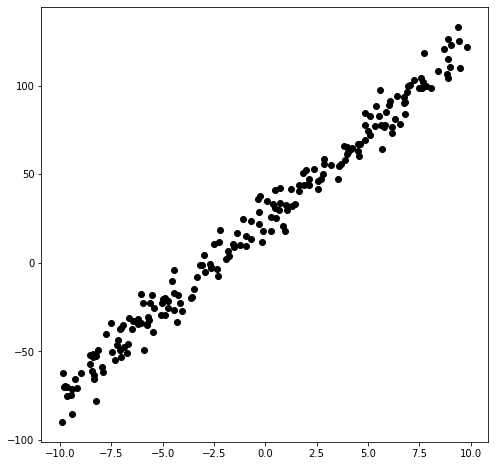

In [7]:
filename = "data.csv"
data = np.genfromtxt(filename, delimiter=',')

x_data = data[:, 0]
y_data = data[:, 1]

fig, ax = make_fig()

ax.scatter(x_data, y_data, c='black')